# Geopandas

#### imports

In [1]:
import sys
import platform
import os
import urllib
import warnings
import numpy as np
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt

#### version info

In [2]:
print('os        {} {}'.format(platform.uname().system, platform.uname().version))
print('python    {}'.format(sys.version.split()[0]))

os        Windows 10.0.17134
python    3.6.6


In [3]:
print(f'numpy      {np.__version__}')
print(f'pandas     {pd.__version__}')
print(f'geopandas  {gpd.__version__}')
print(f'matplotlib {sys.modules["matplotlib"].__version__}')

numpy      1.15.4
pandas     0.23.4
geopandas  0.4.0
matplotlib 2.2.2


#### settings

In [4]:
warnings.filterwarnings('ignore')

#### retreive polygons (gemeentegrenzen)

In [5]:
file_url = 'http://www.imergis.nl/shp/2018-Imergis_gemeentegrenzen_kustlijn-shp.zip'
file_loc = os.path.join(os.pardir, 'shapefile', file_url.split('/')[-1])

In [6]:
try:
    urllib.request.urlretrieve(file_url, file_loc)
except Exception as E:
    print(E)

In [7]:
gemeentegrenzen = gpd.read_file('zip://{}'.format(file_loc))

#### show shapefile

In [8]:
gemeentegrenzen.head()

,id,code,gemeentena,geometry
0,1,0584,Oud-Beijerland,"POLYGON ((86155.55100000001 425626.193, 86155...."
1,18,0160,Hardenberg,"POLYGON ((235753.945 520891.056, 235788.817 52..."
2,19,0327,Leusden,"POLYGON ((156842.831 462252.598, 156843.065 46..."
3,20,1931,Krimpenerwaard,"POLYGON ((104334.072 443036.486, 104342.974 44..."
4,21,1701,Westerveld,"POLYGON ((207869.464 536733.644, 207862.002 53..."


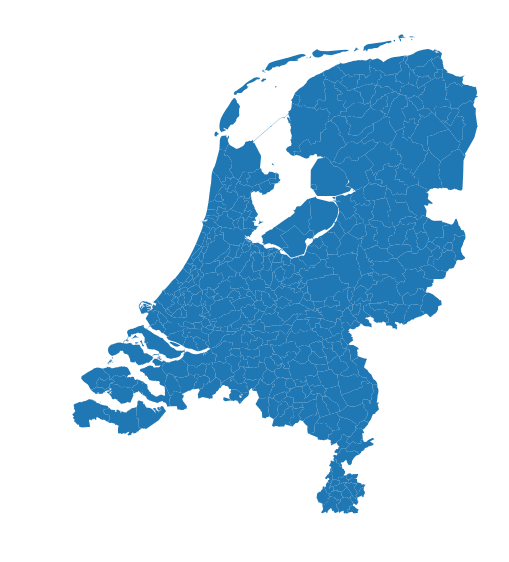

In [9]:
gemeentegrenzen.plot(figsize=(8, 10))
plt.axis('off')
plt.show()

#### continuous variable

In [10]:
gemeentegrenzen['var_1'] = np.random.randint(1, 11, gemeentegrenzen.shape[0])

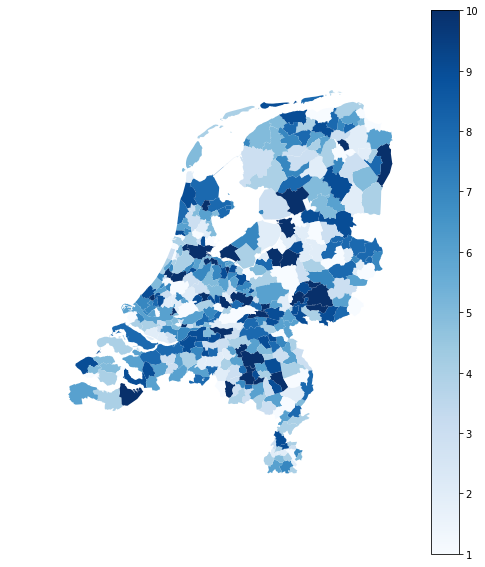

In [11]:
# plot as continuous
gemeentegrenzen.plot(figsize=(8, 10), column='var_1', cmap='Blues', legend=True)
plt.axis('off')
plt.show()

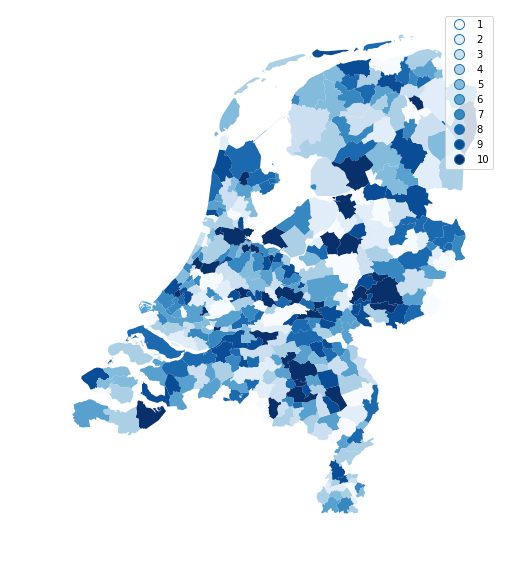

In [12]:
# plot as categorical
gemeentegrenzen.plot(figsize=(8, 10), column='var_1', categorical=True, cmap='Blues', legend=True)
plt.axis('off')
plt.show()

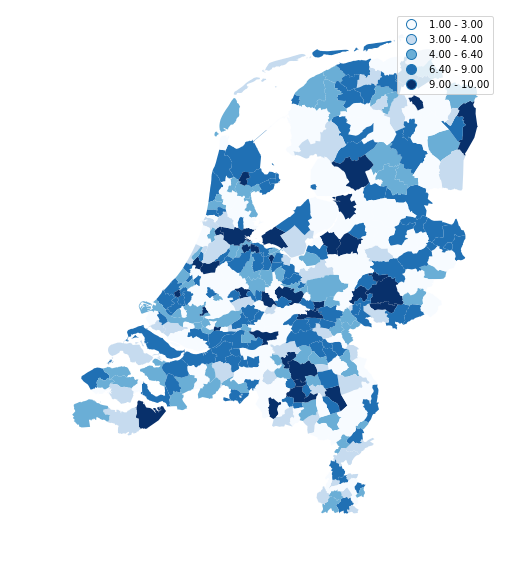

In [13]:
# group by quantiles
gemeentegrenzen.plot(figsize=(8, 10), column='var_1', scheme='quantiles', cmap='Blues', legend=True)
plt.axis('off')
plt.show()

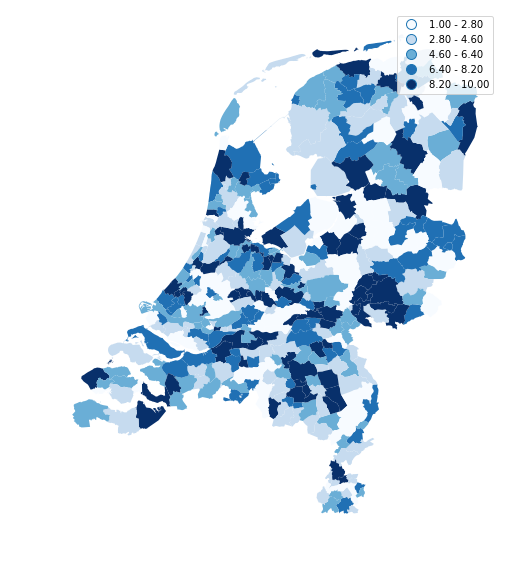

In [14]:
# group by equal intervala
gemeentegrenzen.plot(figsize=(8, 10), column='var_1', scheme='equal_interval', cmap='Blues', legend=True)
plt.axis('off')
plt.show()

#### categorical  variables

In [15]:
gemeentegrenzen['var_2'] = np.random.choice([_ for _ in 'ABCDE'], gemeentegrenzen.shape[0], replace=True)

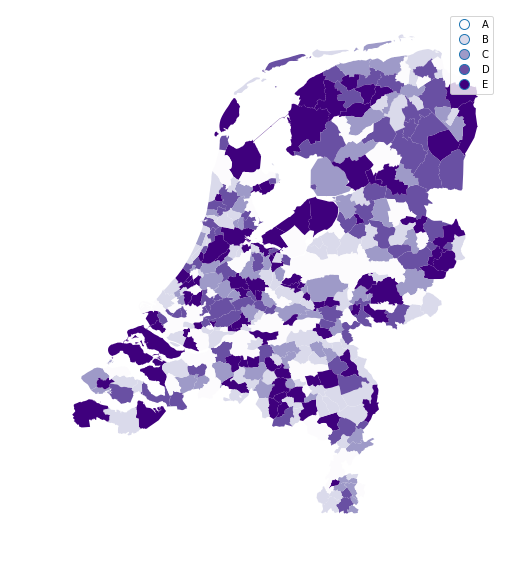

In [16]:
gemeentegrenzen.plot(figsize=(8, 10), column='var_2', cmap='Purples', legend=True)
plt.axis('off')
plt.show()

#### legend location

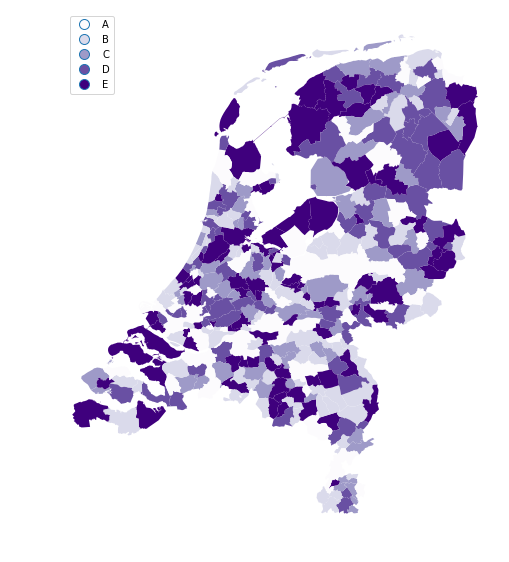

In [17]:
f, ax = plt.subplots(figsize=(8, 10))
gemeentegrenzen.plot(ax=ax, column='var_2', cmap='Purples', legend=True)
legend = ax.get_legend()
legend.set_bbox_to_anchor((0.15, 0, 0, 1))
plt.axis('off')
plt.show()

#### coordinate reference system

In [18]:
gemeentegrenzen.crs # https://epsg.io/28992

{'proj': 'sterea',
 'lat_0': 52.15616055555555,
 'lon_0': 5.38763888888889,
 'k': 0.9999079,
 'x_0': 155000,
 'y_0': 463000,
 'ellps': 'bessel',
 'units': 'm',
 'no_defs': True}

#### add geospatial data

In [19]:
gemeentegrenzen['ha'] = gemeentegrenzen.geometry.area / 100**2 # area in hectares

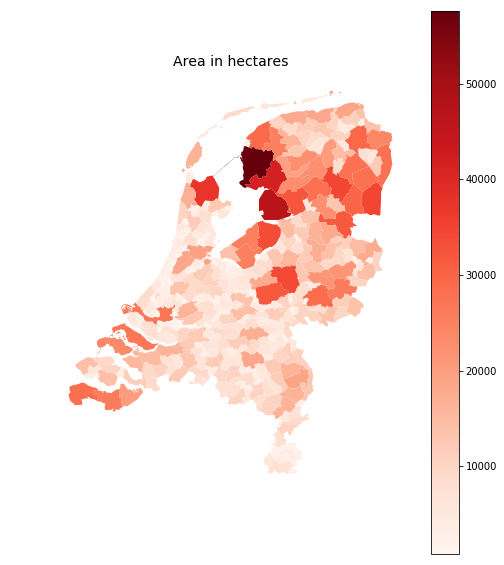

In [20]:
f, ax = plt.subplots(figsize=(8, 10))
gemeentegrenzen.plot(ax=ax, column='ha', cmap='Reds', legend=True)
plt.title('Area in hectares', fontsize=14)
plt.axis('off')
plt.show()

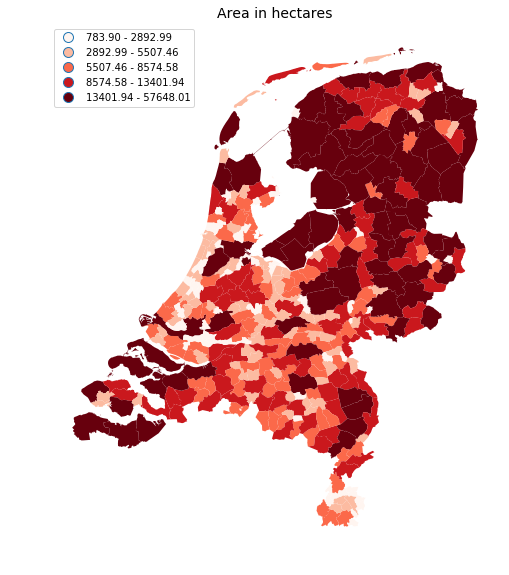

In [21]:
f, ax = plt.subplots(figsize=(8, 10))
gemeentegrenzen.plot(ax=ax, column='ha', scheme='quantiles', cmap='Reds', legend=True)
plt.title('Area in hectares', fontsize=14)
legend = ax.get_legend()
legend.set_bbox_to_anchor((0.33, 0, 0, 1))
plt.axis('off')
plt.show()

#### retreive points (gemeente- en provinciehuizen)

In [22]:
file_url = 'http://www.imergis.nl/shp/2018-02-Imergis-OOV-Gemprovhuizen-utf8-shp.zip'
file_loc = os.path.join(os.pardir, 'shapefile', file_url.split('/')[-1])

In [23]:
try:
    urllib.request.urlretrieve(file_url, file_loc)
except Exception as E:
    print(E)

In [24]:
gemprovhuizen = gpd.read_file('zip://{}'.format(file_loc))

In [25]:
gemprovhuizen.head(3)

,x,y,x-nav,y-nav,bagvboid,organisati,loc_type,loc_naam,loc_straat,huisnr,postcode,woonplaats,gemeente,regionr,website,telefoon,code,bijzonderh,geometry
0,247170,558442,247188,558509,1.680010e+15,Gem. Aa en Hunze,Gemeentehuis (Publ.),"postbus 93, 9460 AB Gieten",Spiekersteeg,1,9461 BH,Gieten,Aa en Hunze,3,www.aaenhunze.nl,0592-267777,1680.0,25.294,POINT (247170 558442)
1,137361,419120,137315,419116,7.380100e+14,Gem. Aalburg,Gemeentehuis (Publ.),"postbus 40, 4260 AA Wijk en Aalburg",Grote Kerkstraat,32,4261 BE,Wijk en Aalburg,Aalburg,20,www.aalburg.nl,0416-698700,738.0,13.061,POINT (137361 419120)
2,111560,475602,111534,475594,3.580100e+14,Gem. Aalsmeer,Gemeentehuis (Publ.),"postbus 253, 1430 AG Aalsmeer",Drie Kolommenplein,1,1431 LA,Aalsmeer,Aalsmeer,13,www.aalsmeer.nl,0297-387575,358.0,31.393,POINT (111560 475602)


#### plot points

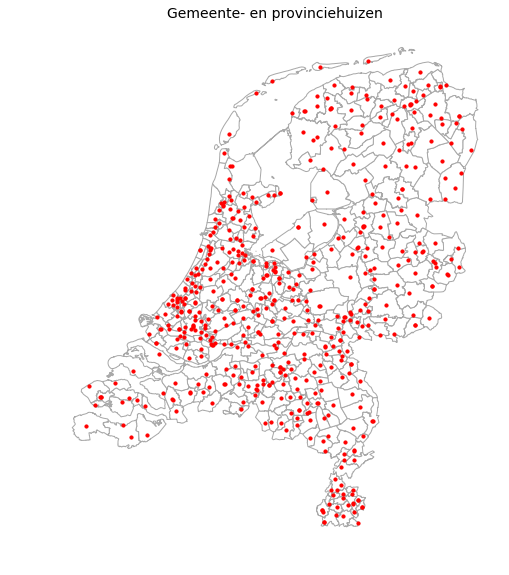

In [26]:
f, ax = plt.subplots(figsize=(8, 10))
gemeentegrenzen.plot(ax=ax, color='white', edgecolor='darkgrey', linewidth=1)
gemprovhuizen.plot(ax=ax, markersize=10, c='red')
plt.title('Gemeente- en provinciehuizen', fontsize=14)
plt.axis('off')
plt.show()

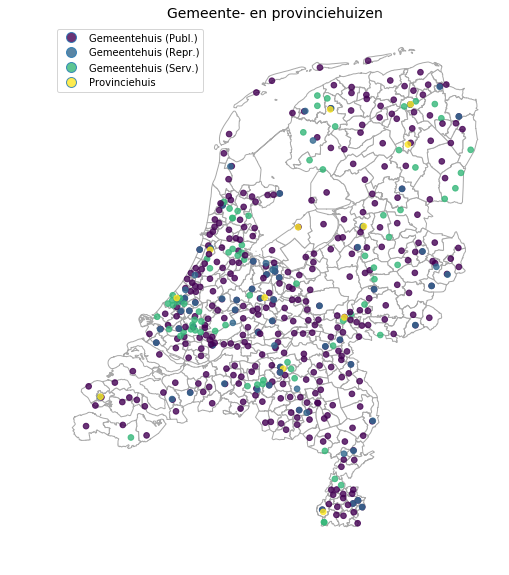

In [27]:
f, ax = plt.subplots(figsize=(8, 10))
gemeentegrenzen.plot(ax=ax, color='white', edgecolor='darkgrey', linewidth=1)
gemprovhuizen.plot(ax=ax, column='loc_type', cmap='viridis', markersize=32, alpha=0.8, legend=True)
plt.title('Gemeente- en provinciehuizen', fontsize=14)
plt.axis('off')
plt.show()

#### spatial join (aantal gemeentehuizen per gemeente)

In [28]:
gemeentehuizen = gemprovhuizen.loc[gemprovhuizen.loc_type.str.startswith('Gemeentehuis'),
                                   ['postcode', 'huisnr', 'geometry']].copy()
gemeentehuizen.head()

,postcode,huisnr,geometry
0,9461 BH,1,POINT (247170 558442)
1,4261 BE,32,POINT (137361 419120)
2,1431 LA,1,POINT (111560 475602)
3,7121 DM,8,POINT (237219 438182)
4,7121 CS,7,POINT (237121 438315)


In [29]:
sjoined = gpd.sjoin(gemeentegrenzen[['gemeentena', 'geometry']], gemeentehuizen,
                    how='left', op='intersects', lsuffix='left', rsuffix='right')
sjoined.head(5)

,gemeentena,geometry,index_right,postcode,huisnr
0,Oud-Beijerland,"POLYGON ((86155.55100000001 425626.193, 86155....",342.0,3262 GM,6
1,Hardenberg,"POLYGON ((235753.945 520891.056, 235788.817 52...",183.0,7772 BR,1
1,Hardenberg,"POLYGON ((235753.945 520891.056, 235788.817 52...",184.0,7701 GM,54
2,Leusden,"POLYGON ((156842.831 462252.598, 156843.065 46...",264.0,3833 LD,16
3,Krimpenerwaard,"POLYGON ((104334.072 443036.486, 104342.974 44...",238.0,2941 ES,58


In [30]:
grp_gemeente = sjoined[['gemeentena']].groupby(by='gemeentena').size()\
    .rename('aantal').sort_values(ascending=False).to_frame()
grp_gemeente.head()

,aantal
gemeentena,
Rotterdam,12
's-Gravenhage,8
Alkmaar,8
Amsterdam,7
Tilburg,6


In [31]:
gemeentegrenzen = pd.merge(gemeentegrenzen, grp_gemeente, how='left', on='gemeentena')
gemeentegrenzen.head()

,id,code,gemeentena,geometry,var_1,var_2,ha,aantal
0,1,0584,Oud-Beijerland,"POLYGON ((86155.55100000001 425626.193, 86155....",3,E,1960.857461,1
1,18,0160,Hardenberg,"POLYGON ((235753.945 520891.056, 235788.817 52...",9,D,31715.045335,2
2,19,0327,Leusden,"POLYGON ((156842.831 462252.598, 156843.065 46...",7,E,5889.305723,1
3,20,1931,Krimpenerwaard,"POLYGON ((104334.072 443036.486, 104342.974 44...",1,D,16130.872547,4
4,21,1701,Westerveld,"POLYGON ((207869.464 536733.644, 207862.002 53...",5,A,28273.915960,1


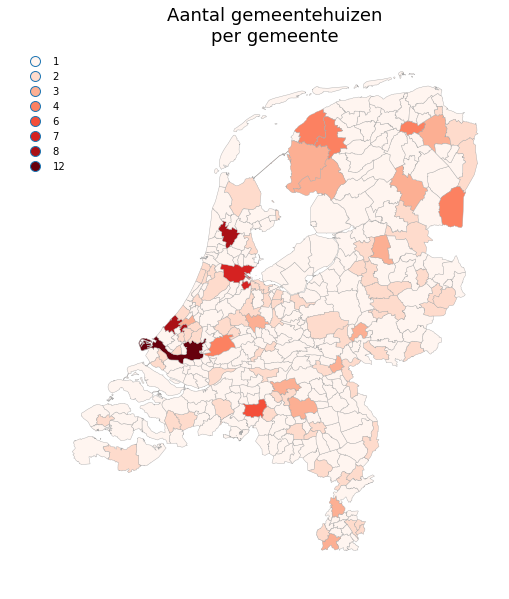

In [32]:
f, ax = plt.subplots(figsize=(8, 10), facecolor='white')
gemeentegrenzen.plot(ax=ax, column='aantal', categorical=True, cmap='Reds', legend=True,
                     edgecolor='darkgrey', linewidth=0.4)
plt.title('Aantal gemeentehuizen\nper gemeente', fontsize=18)
legend = ax.get_legend()
legend.get_frame().set_alpha(0)
legend.set_bbox_to_anchor((0.05, 0, 0, 1))
plt.axis('off')
plt.show()

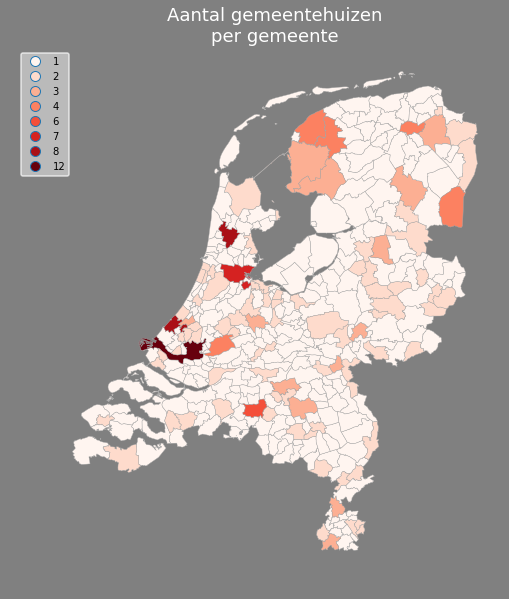

In [33]:
f, ax = plt.subplots(figsize=(8, 10), facecolor='grey')
gemeentegrenzen.plot(ax=ax, column='aantal', categorical=True, cmap='Reds', legend=True,
                     edgecolor='darkgrey', linewidth=0.4)
plt.title('Aantal gemeentehuizen\nper gemeente', fontsize=18, color='white')
legend = ax.get_legend()
legend.get_frame().set_alpha(0.7)
legend.get_frame().set_facecolor('lightgrey')
legend.get_frame().set_edgecolor('white')
legend.get_frame().set_linewidth(1.5)
legend.set_bbox_to_anchor((0.05, 0, 0, 1))
plt.axis('off')
plt.show()

#### save figure

In [34]:
filepath = os.path.join(os.pardir, 'output', 'map_1')
f.savefig(filepath, facecolor='grey') # with facecolor specified

In [35]:
filepath = os.path.join(os.pardir, 'output', 'map_2')
f.savefig(filepath) # without facecolor specified